In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Incremental Search

This method is used to locate intervals containing a root of the function $f(x)$. It is based on the observation that the function changes sign on the opposite sides of the root. If $f(x)$ is continuious and real in the interval from $x_l$ to $x_u$ and $f(x_l)$ and $f(x_u)$ have opposite signs, i.e., $f(x_l)f(x_u) <0$, then there is at least one root between $x_l$ and $x_u$. This is shown in figure below. For the function $f(x)=-\sin(3x)+\sin(5x)$, in the interval [1,5] there are 6 intervals within which the function changes sign (i.e., it passes through the $y=0$ line). Therefore, we expect this function to have 6 roots in this interval.

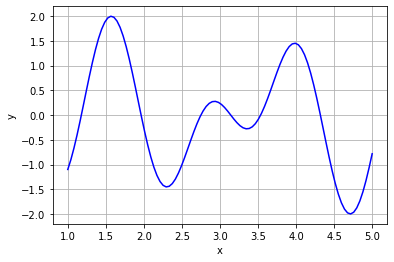

In [ ]:
x1 = np.linspace(1, 5, 100)
f1 = lambda x1: -np.sin(3*x1)+np.sin(5*x1)
y1=f1(x1)
plt.plot(x1,y1,'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('true')

The `incsearch` function can be used to determine the number of brackets containing at least a root. It scans the function within an interval with a given sub-interval size to find the locations where it changes sign.

# Code: incsearch function

In [ ]:
def incsearch(func, xmin, xmax, npts = 20): #incsearch function
    """Search for brackets containing roots of a function

    incsearch(func, xmin, xmax, npts)
    Finds brackets within [xmin,xmax] interval containing the roots of the function func
    Input:
    - func: an anonymous function
    - xmin, xmax: lower and upper limits of the interval
    - npts: number of points within the interval (optional, default = 20)
    Output:
    - nb: number of brackets found
    - xb: an array containing the upper and lower limits of all brackets.
          xb[i][1] and xb[i][2] are the lower and upper limits of the ith bracket.
          If nb=0, xb=[] which indicates that no brackets are found.
    """

    x = np.linspace(xmin, xmax, npts)     # generate npts number of points within [xmin,xmax] interval
    fx = func(x)                          # calculate the value of the function at all points within x
    xsize = np.size(x) # obtain the size of x
    nb = 0   # number of brackets = 0 initially
    xb = []  # brackets = empty initially
    for i in range(xsize-1):                #  loop over elements of x from 0 to xsize-1
        if np.sign(fx[i] * fx[i + 1]) < 0:  # checking for sign change. If a bracket is found do the following:
            nb = nb + 1                     # increase the bracket count by 1
            xb.append((x[i], x[i + 1]))     # add the bracket to xb
    if xb==[]:  # if no brackets found display a message
        print("<> no brackets found within the [xmin,xmax] interval. Change the interval or increase npts")
    return nb, xb   #returns nb and xb

# Example

Find the brackets within the interval [3,6] for the function $f(x)=\sin(12x)-\sin(2x)$.

In [ ]:
f = lambda x: np.sin(12*x)-np.sin(2*x)   #anonymous function definition

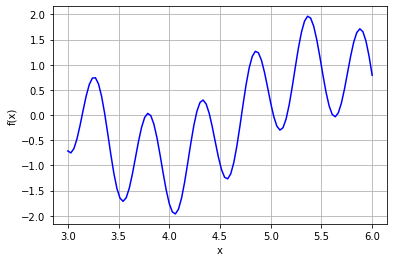

In [ ]:
# Plotting the function
x = np.linspace(3, 6, 100)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')

By visualing inspecting the figure above, we guess to obtain 11 brackets within which the function changes sign (i.e., it passes through $f(x)=0$). It is observed that there could be 2 brackets near $x=5.6$ and 2 near $x=3.7$ in which $f(x)=0$ is close a local optimum point of the function. We try to find the brackets using the `incsearch` function using the default `npts=20` value.

In [ ]:
nb, xb = incsearch(f, 3, 6)  #calling the incsearch function (npts=20 by default)
# Printing nb and xb on the screen
print('Number of brackets: ', nb)
print("Brackets:")
print('lower x limit   upper x limit')
print('-------------  --------------')
for i in range(nb): # printing xb as a table (formatted output)
    print('  {0:7.4f}        {1:7.4f}' .format(xb[i][0],xb[i][1]))


Number of brackets: 7
Brackets:
lower x limit   upper x limit
-------------  --------------
   3.0000         3.1579
   3.3158         3.4737
   3.6316         3.7895
   3.7895         3.9474
   4.5789         4.7368
   4.8947         5.0526
   5.0526         5.2105


However, `incsearch` only gives 7 intervals and 4 are missed. This is because the sub-intervals are too wide to capture the intervals near the optimum points of the funcation located near $f(x)=0$. To decrease the sub-interval width, we run the `incsearch` function again by increasing the `npts` variable.

In [ ]:
nb, xb = incsearch(f, 3, 6, 100)  #calling the incsearch function with npts=100
# Printing nb and xb on the screen
print('Number of brackets: {0}' .format(nb))
print("Brackets:")
print('lower x limit   upper x limit')
print('-------------  --------------')
for i in range(nb): # printing xb as a table (formatted output)
    print('  {0:7.4f}        {1:7.4f}' .format(xb[i][0],xb[i][1]))

Number of brackets: 11
Brackets:
lower x limit   upper x limit
-------------  --------------
   3.1212         3.1515
   3.3636         3.3939
   3.7576         3.7879
   3.7879         3.8182
   4.2424         4.2727
   4.3939         4.4242
   4.6970         4.7273
   5.0000         5.0303
   5.1515         5.1818
   5.6061         5.6364
   5.6364         5.6667


This time we are able to capture all 11 brackets. Increasing *npts* no longer changes the results indicating that all brackets have been founds. This is shown by further increasing the `npts` value.

In [ ]:
nb, xb = incsearch(f, 3, 6, 500)  # calling the incsearch function with npts=500
# Printing nb and xb on the screen
print('Number of brackets: {0}' .format(nb))

Number of brackets: 11


# Exercise
Find the brackets for the function $f(x)=\sin(5x)-\cos(x)$ in the interval [0,10]. Verify that all brackets are found. List the brackets. Plot the function and verify that you findinds are consistent with the plot. [*Answer: number of brackets=17*].
